# Homework4: Instructions

1) Write down 3 questions and their brief answers on the reading material. [2 Points]

$\textbf{Question1}$: What is Lateral inhibtion?

$\textit{Answer}$: In a simplest form of competitve neural network, the network's feedback perform lateral inhibition, where in each neuron tends to inhibit the neuron laterally connected to it, thereby attempts to win the competition. In contrast, the feed forward network synpatic connections are all excitory in nature. 
    
$\textbf{Question2}$: Describe Credit assignment problem?

$\textit{Answer}$: Assigning either credit or blame for overall outcome to each of the internal decisions made by a learning machine, which contributed to the outcome, is described as Credit assignment problem. It is further decomposed in to two subproblems : Temporal credit assignment problem and Structral credit assignment problem.
    
$\textbf{Question3}$: What is Delayed reinforcement, and why is it difficult to perform?

$\textit{Answer}$: A system is said to learn under delayed reinforcement, when the system observes a temporal sequence of stimuli (state vectors) received from the environment, which eventually results in generation of heuristic reinforcement signal. 

There are two reasons which made delayed reinforcement difficult to perform:<br>
a. There is no desired response available at each step of the learning process due to absense of teacher.<br>
b. Learning machine is expected to solve temporal credit assignment problem, leading to delay in generation of primary reinforcement signal, but primary reinforcement signal evaluates only the outcome and not each action sequence. 

2) Read the rest of chapter 2 from Haykin’s book (2nd edition). Summarize or sketch your insights in mind-map or an outline or a summary. [4 Points]

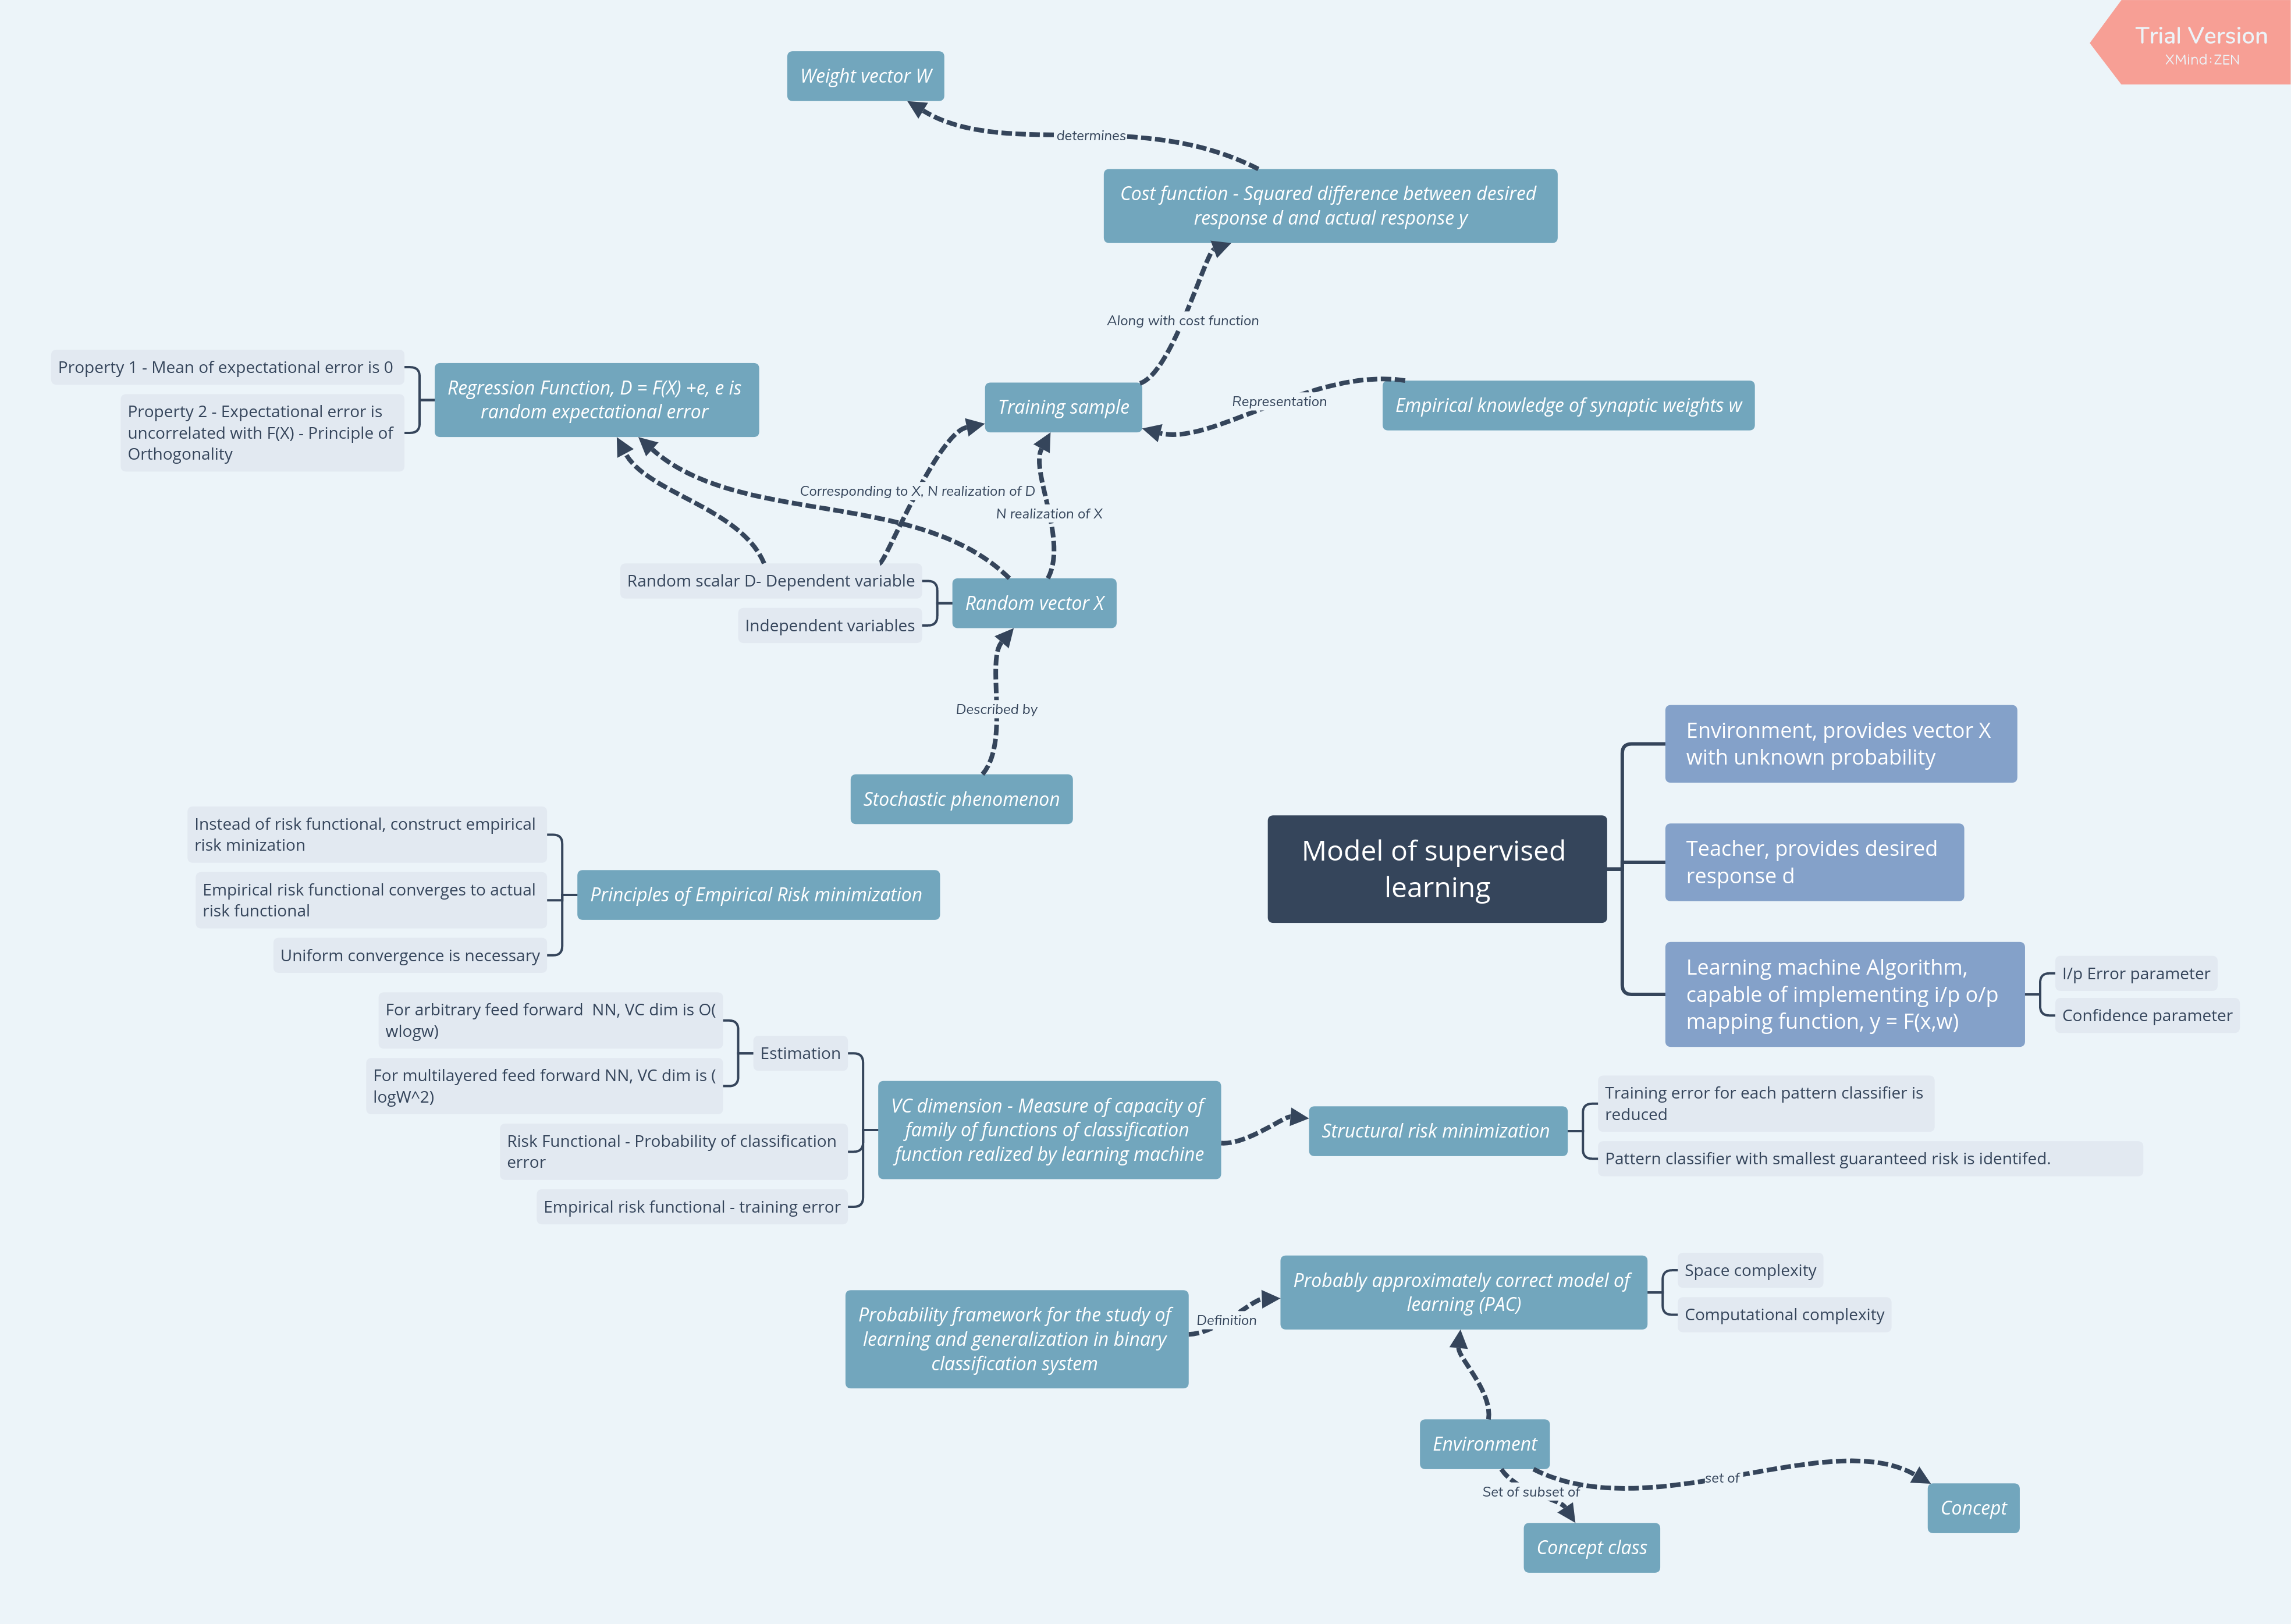

3) Definition: consistent learner

• A learner is consistent if it outputs hypotheses that perfectly fit the training data, whenever possible. It is quite reasonable to ask that a learning algorithm be consistent, given that we typically prefer a hypothesis that fits the training data over one that does not.

Task:

• Write a consistent learner for Hr from last Exercise (i.e. Hr = {((a < x < b)⋀(c < y < d)) | a, b,c, d ∈ IR } ). Generate a variety of target concept rectangles at random, corresponding to different rectangles in the plane. Generate random examples of each of these target concepts, based on a uniform distribution of instances within the rectangle from (0,0) to (100, 100).

Plot the generalization error as a function of the number of training examples, m. On the same graph, plot the theoretical relationship between e and m, for d = .95. Does theory fit experiment?

Note: the consistent learner is not NN.
[8 Points]

Learning is concerned with finding a function  that is similar to a certain target function or concept. A hypothesis might perform well on the training data, but doesn't generalize well to unseen data. It is essential to determine measure of error between the target function and certain hypothesis.

* Empirical error ($E_{in}$) - the insample error indicates the fraction of $S$ where the target and hypothesis disagree. The empirical error tells how well a hypothesis performs on the training data set. However, how well hypothesis performs on the whole input space i.e, the true error of the hypothesis is quantified by the generalization error. 

* Generalization error($E_{out}$)- Also called out sample error, is the probability of mismatch between the hypothesis and target function, given the hypothesis, target function and underlying distribution.

The learning algorithm will choose a hypothesis in order to approximate the unknown target function $f$. If learning is possible, then the generalization error $E_{out}$ should approximate to zero. However, it is impossible for us to verify directly since both target function $f$ and $E_{out}$ remain unknown. 

However, we can examine under which conditions $E_{out} - E_{in}$ $\approx 0 $, when these conditions are met, the hypothesis is picked with low empirical error and we know it would generalize well. 

Theoretical relationship between $\epsilon$ and $m$ :

The distance between the true right endpoint $r$ of target  interval $c$  and the training examples closet to $r$ follow an exponential distribution, with expectation proportional to $\frac{1}{m}$.

It follows that error $\epsilon$ of $h$ exceeds $\frac{i}{m}$ only with probability of some constant base greater than 1. This yeilds the relation 

$$ \epsilon =  \log \frac{(\frac {1}{\delta})}{m}$$

Hence, 

$$ m =  \log \frac{(\frac {1}{\delta})}{\epsilon}$$

From $m$ training examples we learn an internal with error at most $\epsilon$, and this happens with probability at least $ 1- \delta$ . This shows that the hypothesis spaces of intervals is PAC learnable. 

In below code, we have choosen three different values of $m$ for creating the rectangles to illusttrate the PAC learnability.

Generalization error: 0.054575


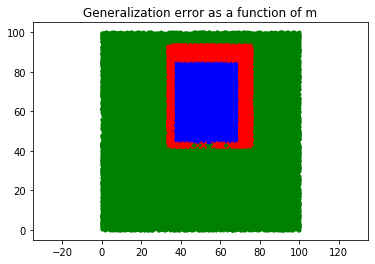

In [7]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Rectangle:
    '''class for creating the rectangle'''
    def __init__(self, minx, miny, maxx, maxy):
        self.minx = minx
        self.maxx = maxx
        self.miny = miny
        self.maxy = maxy
    def in_rectangle(self, X):
        return np.array((X[:,0] >= self.minx) & (X[:,0] <= self.maxx) & (X[:,1] >= self.miny) & (X[:,1] <= self.maxy))
    
def target_rectangle(X):
    '''creating a target rectangle'''
    R_minx = random.randrange(int(np.min(X[:,0])), int(np.median(X[:,0])))
    R_miny = random.randrange(int(np.min(X[:,1])), int(np.median(X[:,1])))
    R_maxx = random.randrange(int(np.median(X[:,0])), int(np.max(X[:,0])))
    R_maxy = random.randrange(int(np.median(X[:,1])), int(np.max(X[:,1])))
    target_rect = Rectangle(R_minx, R_miny, R_maxx, R_maxy)
    
    return target_rect

def hypo_rectangle(X, RT):
    '''creating a hypothesis rectangle, in our case C=H'''
    rt = RT.in_rectangle(X)
    hr_minx = np.min(X[rt == 1, 0])
    hr_miny = np.min(X[rt == 1, 1])
    hr_maxx = np.max(X[rt == 1, 0])
    hr_maxy = np.max(X[rt == 1, 1])
    hyp_rect = Rectangle(hr_minx, hr_miny, hr_maxx, hr_maxy)
    
    return hyp_rect


delta = 0.95
epsilon = 0.1
vcdim = 4 #VC dimension of axis alligned rectangles is 4

# creating two uniform distributions for creating the target rectangle with in the reange 0 to 100
m1 = 350 #number of training samples taken at random
X1 = np.random.uniform(0, 100, size=m1) #uniform distribution
X2 = np.random.uniform(0, 100, size=m1) #uniform distribution
X = np.transpose([X1, X2])

# creating two uniform distributions for creating the hyphothesis rectangle with in the reange 0 to 100
m2 = 100#number of training samples taken at random
Y1 = np.random.uniform(0, 100, size=m2)#uniform distribution
Y2 = np.random.uniform(0, 100, size=m2)#uniform distribution
Y = np.transpose([Y1, Y2])

# creating two uniform distributions for creating the for estimating the generalization error
m3 = 40000#number of training samples taken at random
Z1 = np.random.uniform(0, 100, size=m3)#uniform distribution
Z2 = np.random.uniform(0, 100, size=m3)#uniform distribution
Z = np.transpose([Z1, Z2])

#creating objects for the class rectangle
RT = target_rectangle(X)
HT = hypo_rectangle(Y, RT)

LT = RT.in_rectangle(Z) #true labels
LP = HT.in_rectangle(Z) #predicted labels
GE = (LT != LP) #generalization error
GE1 = np.mean(GE)
print("Generalization error:",GE1)

plt.title("Generalization error as a function of m")
plt.plot(Z[LT == 1, 0], Z[LT == 1, 1], '.', c='b')
plt.plot(Z[LT == 0, 0], Z[LT == 0, 1], '.', c='g')
plt.plot(Z[GE == 1, 0], Z[GE == 1, 1], 'x', c='r')
plt.axis('equal')
plt.show()
#referred - https://github.com/howardyclo/NTHU-Machine-Learning/tree/master/assignments/hw1-PAC-learning-rectangle

4) Consider training a two-input perceptron. Give an upper bound on the number of training examples sufficient to assure with 90%  confidence that the learned perceptron will have true error of at most 5%. Does this bound seem realistic? [8 Points]

For a $H = single\; perceptron$ with $r-inputs$ we have: $VCdim(H) = r+1$.

From the problem statement we know that -

number of inputs to a perceptron is $r = 2$ $\implies$ $VCdim(H) = 3$

Total number of training examples needed to learn for a singel perceptron is given by

$$m \geq \frac{1}{\epsilon}\big(4\log_2\big(\frac{2}{\delta}\big)+8(r+1)\log_2\big(\frac{13}{\epsilon}\big)\big) ---- (1) $$  
where:

$\epsilon = 0.05$ true error in learning a hypothesis with true error of $5\%$

$probability\; p = 0.9$ confidence of the learned perceptron.

And $p = 1 - \delta$

$\implies$ $\delta = 1 - 0.9$  $\implies$ $\delta = 0.1$

Substituting these values in above equation for calculating total number of examples -

$$m \geq \frac{1}{0.05}\big(4\log_2\big(\frac{2}{0.1}\big)+8(2+1)\log_2\big(\frac{13}{0.05}\big)\big) $$

$$m \geq 4196.490$$

$$m \approx 4197$$

So upper bound on the number of training examples sufficient to assure with $90\%$  confidence that the learned perceptron will have true error of at most $5\%$ is 4197.

From Haussler's Theorem and the definition of Probably approximately correct (PAC) learning it follows,
if a learning algorithm is consistent and $|H|e^{-em} = \delta $ , then the algorithm PAC learns  the considered concept set, using at most m (as in eq(1) ) training instance.

The sample size bound m depends  on the different parameters. The size of H influences m logarithimically so does the inverse of $\delta$. 

Hence high confidence that the learned hypothesis is within the desired error bound $\epsilon$. The error $\epsilon$ appears in denominator. In order to halve the classification error rate, we must in general double the sample size. 

However, it is noticed that the general upper bound on m is often too pessimistic ( due to the generous bounds in the proof of Haussler's theorem).The actual sample size might be smaller than what was proved.




In [1]:
import numpy as np

def number_of_example_samples(epsilon, delta):
   '''returns the total number of examples sample
   for assuring the expected confidence and the true error
   provided for the training of perceptron'''
   return ((4*np.log2(2/delta))+(8*3*np.log2(13/epsilon)))/epsilon

epsilon = 0.05
delta = 0.1

m = number_of_example_samples(epsilon, delta)
print("Number of training samples:" ,m)

Number of training samples: 4196.490797844647


5)  Consider the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d),    
   where a, b, c and d are integers in the interval (0,99). Note each concept in this class correspondsto a rectangle with integer-valued boundaries on a portion of the x, y  plane.   
   Hint: Given a region in the plane bounded by the points (0,0)  and (n -1 , n - I),  the number of distinct rectangles with integer-valued boundaries within this region is $1/4 *  n(n+1)^2$
- Give an upper bound on the number of randomly drawn training examples sufficient to assure that for any target concept c  in C,  any consistent learner using H = C  will, with probability 95%, output a hypothesis with error at most 0.15 !
- Now suppose the rectangle boundaries a, b, c,  and d  take on real values instead of integer values. Update your answer to the first part of this question.
[8 Points]

a. From the problem statement we know that -
Upper bound on the number of randomly drawn training examples is given by
$$m \geq \frac{1}{\epsilon}\big(\ln\big(|H|\big)+\ln\big(\frac{1}{\delta}\big)\big) $$

# For the hypothesis given in the hint of the question is:
$$|H| = \frac {1}{4} * n(n+1)^2$$

$n$ is the total number of samples $n = 100$

$$\implies |H| = \frac{1}{4}*100*101^2$$

$$\implies |H| = 255025$$

$\epsilon = 0.15$ true error in learning a hypothesis with true error of $0.15$

$probability\; p = 0.95$.

And $p = 1 - \delta$

$\implies$ $\delta = 1 - 0.95$  $\implies$ $\delta = 0.05$

Substituting these values in above equation for calculating total number of examples -

$$m \geq \frac{1}{0.15}\big(\ln\big(255025\big)+\ln\big(\frac{1}{0.05}\big)\big) $$

$$m \geq 102.9656$$

$$\implies m \approx 103$$

# For the hypothesis given in Tom Mitchel's text book

$$|H| = \big(\frac {n(n+1)}{2}\big)^2$$

$n$ is the total number of samples $n = 100$

$$\implies |H| = \big(\frac{100(100+1)}{2}\big)^2$$

$$\implies |H| = 25502500$$

$\epsilon = 0.15$ true error in learning a hypothesis with true error of $0.15$

$probability\; p = 0.95$.

And $p = 1 - \delta$

$\implies$ $\delta = 1 - 0.95$  $\implies$ $\delta = 0.05$

Substituting these values in above equation for calculating total number of examples -

$$m \geq \frac{1}{0.15}\big(\ln\big(25502500.0\big)+\ln\big(\frac{1}{0.05}\big)\big) $$

$$m \geq 133.6667$$

$$\implies m \approx 134$$

# For rectangle boundaries with real values

Since the rectangle boundaries a,b,c,d now take the real-valued thresholds in our hypotheses, the size of the hypothesis space is infinite. Thus, we use a VC dimension-based bound in this case. The VC dimension for the rectangle is 4.

$$m \geq \frac{1}{\epsilon}\big(4\log_2\big(\frac{2}{\delta}\big)+8VCdim(H)\log_2\big(\frac{13}{\epsilon}\big)\big) $$

$$\implies m \geq \frac{1}{0.15}\big(4\log_2\big(\frac{2}{0.05}\big)+8*4*\log_2\big(\frac{13}{0.15}\big)\big) $$

$$\implies m \geq 1515.23$$

$$\implies m \approx 1515$$

In [1]:
import numpy as np

def hypothesis_hint_question(n):
   '''provides the VC dimension'''
   return ((1/4)*n*(n+1)**2)

def hypothesis_TM_book(n):
   '''provides the VC dimension'''
   return ((n*(n+1))/2)**2

def sample_examples(h, epsilon, delta):
   '''provides number of example samples'''
   return ((1/epsilon)*(np.log(h)+np.log(1/delta)))

def real_value_examples(vcdim, epsilon, delta):
   '''provide number of samples for real valued inputs'''
   return ((1/epsilon)*((4*np.log2(2/delta))+(8*vcdim*np.log2(13/epsilon))))

epsilon = 0.15
delta = 0.05
n = 100

m1 = sample_examples(hypothesis_hint_question(n), epsilon, delta)
m2 = sample_examples(hypothesis_TM_book(n), epsilon, delta)
m3 = real_value_examples(4, epsilon, delta)

print("Training samples for hypothesis given in hint:",m1)
print("Training samples for hypothesis given in Book:",m2)
print("Training samples for hypothesis given in case of real valued rectangle boundaries:",m3)

Training samples for hypothesis given in hint: 102.96566088069808
Training samples for hypothesis given in Book: 133.666795453952
Training samples for hypothesis given in case of real valued rectangle boundaries: 1515.2312158225534


Authors:

Shravanthi Arvind Patil <br>
Sreenivasa Hikkal Venugopala